In [1]:
import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import warnings
warnings.simplefilter("ignore")
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, Subset

import torchvision

from torchvision import datasets, transforms
from torchvision.transforms import ToPILImage
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

# from PIL import Image

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

train_trans = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.Resize([224,224]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
])

test_trans = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])
#%%

train_data = datasets.ImageFolder('/home/strike/work/learn/guu/dl_guu_23/07/cats_and_dogs/training_set/training_set/', transform=train_trans)
test_data = datasets.ImageFolder('/home/strike/work/learn/guu/dl_guu_23/07/cats_and_dogs/test_set/test_set/', transform=test_trans)
#%%
import numpy as np
t = range(len(test_data))
t = np.random.permutation(t)
n = int(len(t)/2)
idx_test = t[:n]
idx_val = t[n:]

val_data = Subset(test_data, idx_val)
test_data = Subset(test_data, idx_test)


#%%
train_loader = torch.utils.data.DataLoader(train_data,
    batch_size=8,    shuffle=True)
    

test_loader = torch.utils.data.DataLoader(test_data,
    batch_size=8,    shuffle=False)

val_loader = torch.utils.data.DataLoader(val_data,
    batch_size=8,    shuffle=False)
#%%
from vit_pytorch import ViT
N = 224

model = ViT(
    image_size = N,
    patch_size = 32,
    num_classes = 2,
    dim = 128,
    depth = 2,
    heads = 4,
    mlp_dim = 256,
    dropout = 0.1,
    emb_dropout = 0.1
)
model.cuda()



...................................................Training Accuracy at epoch 1 is:  0.5373134328358209
Validation Accuracy at epoch 1 is:  0.4630541871921182
...................................................Training Accuracy at epoch 2 is:  0.527363184079602
Validation Accuracy at epoch 2 is:  0.5369458128078818
...................................................Training Accuracy at epoch 3 is:  0.5422885572139303
Validation Accuracy at epoch 3 is:  0.5369458128078818
...................................................Training Accuracy at epoch 4 is:  0.599502487562189
Validation Accuracy at epoch 4 is:  0.5615763546798029
...................................................Training Accuracy at epoch 5 is:  0.5199004975124378
Validation Accuracy at epoch 5 is:  0.5369458128078818
...................................................Training Accuracy at epoch 6 is:  0.5945273631840796
Validation Accuracy at epoch 6 is:  0.5714285714285714
................................................

In [3]:
loss_func = torch.nn.CrossEntropyLoss() 

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.003)

val_acc=[]
loss_list=[]
train_acc =[]
for epoch in range(40):
    loss_sublist = []
    corr = 0
    for x, y in train_loader:
        model.train()
        optimizer.zero_grad()
        x = x.cuda()
        y = y.cuda()
        preds = model(x)
        loss = criterion(preds, y)
        loss_sublist.append(loss.data.item())
        loss.backward()
        optimizer.step()
       
        _, yhat = torch.max(preds.data, 1)
        corr += (yhat == y).sum().item()
        print(".",end='',flush = True )
    
    loss_list.append(np.mean(loss_sublist))
    acc = corr/len(train_data)
    print("Training Accuracy at epoch",epoch+1,"is: ",acc)
    train_acc.append(acc)
    
    correct=0
    with torch.no_grad():
        for x_test, y_test in test_loader:
            model.eval()
            x_test = x_test.cuda()
            y_test = y_test.cuda()
            z = model(x_test)
            _, yhat1 = torch.max(z.data, 1)
            correct += (yhat1 == y_test).sum().item()
    accuracy = correct / len(test_data)
    print("Validation Accuracy at epoch",epoch+1,"is: ",accuracy)
    val_acc.append(accuracy)

...................................................Training Accuracy at epoch 1 is:  0.572139303482587
Validation Accuracy at epoch 1 is:  0.5566502463054187
...................................................Training Accuracy at epoch 2 is:  0.6268656716417911
Validation Accuracy at epoch 2 is:  0.5566502463054187
...................................................Training Accuracy at epoch 3 is:  0.6119402985074627
Validation Accuracy at epoch 3 is:  0.5665024630541872
...................................................Training Accuracy at epoch 4 is:  0.6119402985074627
Validation Accuracy at epoch 4 is:  0.5665024630541872
...................................................Training Accuracy at epoch 5 is:  0.5696517412935324
Validation Accuracy at epoch 5 is:  0.5714285714285714
...................................................Training Accuracy at epoch 6 is:  0.6368159203980099
Validation Accuracy at epoch 6 is:  0.5714285714285714
...............................................

In [23]:
t = test_data[0][0].to('cuda')
t = t.unsqueeze(0)
v = model
from vit_pytorch.recorder import Recorder
v = Recorder(v)
#print(t.shape)

# img = torch.randn(1, 3, 256, 256)
preds, attns = v(t)

In [37]:
print(attns.shape)
attns = attns.cpu()
at = attns.numpy()
at = at[:,1,2,:,:]
at = at.squeeze(0)

torch.Size([1, 2, 4, 50, 50])


In [38]:
at.shape

(50, 50)

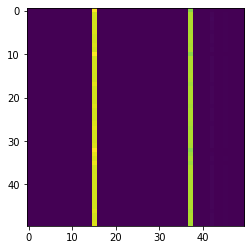

In [39]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(at)

In [40]:
at

array([[0.0000000e+00, 6.9169592e-10, 2.9093907e-27, ..., 6.4895589e-10,
        6.2268285e-08, 4.6734217e-30],
       [0.0000000e+00, 1.8764418e-07, 1.8709697e-19, ..., 1.7088848e-07,
        1.5214168e-06, 3.6109948e-22],
       [0.0000000e+00, 1.9718716e-07, 1.7371355e-19, ..., 1.7993590e-07,
        1.7254114e-06, 4.4750663e-22],
       ...,
       [0.0000000e+00, 1.8706757e-07, 1.8705786e-19, ..., 1.7034257e-07,
        1.5091005e-06, 3.5675261e-22],
       [0.0000000e+00, 1.7846708e-07, 1.7059513e-19, ..., 1.6255068e-07,
        1.4429299e-06, 3.0171357e-22],
       [0.0000000e+00, 5.5549933e-08, 4.2318762e-21, ..., 5.0812403e-08,
        7.0658916e-07, 6.7907119e-24]], dtype=float32)